In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
# Parameters for dataset generation
n_samples = 1000
n_features = 20
n_informative = 15
n_redundant = 5
n_classes = 5

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, n_classes=n_classes, random_state=42)


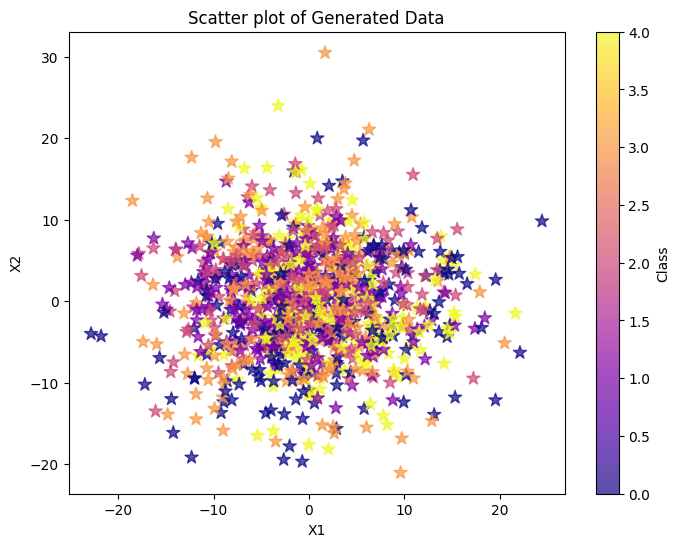

In [3]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data points in the 2D plane
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', s=100, alpha=0.7, marker='*')
plt.title('Scatter plot of Generated Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Class')
plt.show()


In [4]:
from keras.utils import to_categorical
# Convert labels to one-hot encoding
y_one_hot = to_categorical(y, num_classes=n_classes)


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


In [6]:
def initialize_weights(self):
    # Example initialization with random weights
    self.weights = [
        np.random.randn(self.input_size, self.hidden_size1),
        np.random.randn(self.hidden_size1, self.hidden_size2),
        np.random.randn(self.hidden_size2, self.hidden_size3),
        np.random.randn(self.hidden_size3, 5)  # 5 output neurons
    ]
    self.biases = [
        np.zeros((1, self.hidden_size1)),
        np.zeros((1, self.hidden_size2)),
        np.zeros((1, self.hidden_size3)),
        np.zeros((1, 5))  # Bias for the output layer
    ]


In [7]:
def softmax(self, z):
    exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def forward(self, X):
    self.z1 = np.dot(X, self.weights[0]) + self.biases[0]
    self.a1 = self.relu(self.z1)
    self.z2 = np.dot(self.a1, self.weights[1]) + self.biases[1]
    self.a2 = self.relu(self.z2)
    self.z3 = np.dot(self.a2, self.weights[2]) + self.biases[2]
    self.a3 = self.relu(self.z3)
    self.z4 = np.dot(self.a3, self.weights[3]) + self.biases[3]
    self.output = self.softmax(self.z4)
    return self.output


In [8]:
def compute_loss(self, y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss


In [9]:
def backward(self, X, y_true, learning_rate=0.01):
    m = X.shape[0]

    # Output layer gradients
    dZ4 = self.output - y_true
    dW4 = np.dot(self.a3.T, dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m

    # Third hidden layer gradients
    dA3 = np.dot(dZ4, self.weights[3].T)
    dZ3 = dA3 * self.relu_derivative(self.z3)
    dW3 = np.dot(self.a2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Second hidden layer gradients
    dA2 = np.dot(dZ3, self.weights[2].T)
    dZ2 = dA2 * self.relu_derivative(self.z2)
    dW2 = np.dot(self.a1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # First hidden layer gradients
    dA1 = np.dot(dZ2, self.weights[1].T)
    dZ1 = dA1 * self.relu_derivative(self.z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases
    self.weights[3] -= learning_rate * dW4
    self.biases[3] -= learning_rate * db4
    self.weights[2] -= learning_rate * dW3
    self.biases[2] -= learning_rate * db3
    self.weights[1] -= learning_rate * dW2
    self.biases[1] -= learning_rate * db2
    self.weights[0] -= learning_rate * dW1
    self.biases[0] -= learning_rate * db1


In [10]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size=5):
        # Initialize weights and biases for each layer
        self.weights = [
            np.random.randn(input_size, hidden_size1),
            np.random.randn(hidden_size1, hidden_size2),
            np.random.randn(hidden_size2, hidden_size3),
            np.random.randn(hidden_size3, output_size)
        ]
        self.biases = [
            np.zeros((1, hidden_size1)),
            np.zeros((1, hidden_size2)),
            np.zeros((1, hidden_size3)),
            np.zeros((1, output_size))
        ]

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def softmax(self, z):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights[0]) + self.biases[0]
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights[1]) + self.biases[1]
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.weights[2]) + self.biases[2]
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3, self.weights[3]) + self.biases[3]
        self.output = self.softmax(self.z4)
        return self.output

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
        return loss

    def backward(self, X, y_true, learning_rate=0.01):
        m = X.shape[0]

        # Output layer gradients
        dZ4 = self.output - y_true
        dW4 = np.dot(self.a3.T, dZ4) / m
        db4 = np.sum(dZ4, axis=0, keepdims=True) / m

        # Third hidden layer gradients
        dA3 = np.dot(dZ4, self.weights[3].T)
        dZ3 = dA3 * self.relu_derivative(self.z3)
        dW3 = np.dot(self.a2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        # Second hidden layer gradients
        dA2 = np.dot(dZ3, self.weights[2].T)
        dZ2 = dA2 * self.relu_derivative(self.z2)
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # First hidden layer gradients
        dA1 = np.dot(dZ2, self.weights[1].T)
        dZ1 = dA1 * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.weights[3] -= learning_rate * dW4
        self.biases[3] -= learning_rate * db4
        self.weights[2] -= learning_rate * dW3
        self.biases[2] -= learning_rate * db3
        self.weights[1] -= learning_rate * dW2
        self.biases[1] -= learning_rate * db2
        self.weights[0] -= learning_rate * dW1
        self.biases[0] -= learning_rate * db1


Epoch 1/100, Loss: 14.230032469417129
Epoch 2/100, Loss: 12.917551759945527
Epoch 3/100, Loss: 14.222276394943478
Epoch 4/100, Loss: 13.877062284584
Epoch 5/100, Loss: 13.118608864887852
Epoch 6/100, Loss: 11.574699740111141
Epoch 7/100, Loss: 10.262732187403358
Epoch 8/100, Loss: 9.73999068196093
Epoch 9/100, Loss: 8.544615092619855
Epoch 10/100, Loss: 8.143352723768912
Epoch 11/100, Loss: 7.597526509206222
Epoch 12/100, Loss: 7.547565612940889
Epoch 13/100, Loss: 7.130896696254539
Epoch 14/100, Loss: 7.319514970610046
Epoch 15/100, Loss: 6.614567322057346
Epoch 16/100, Loss: 6.648448700609768
Epoch 17/100, Loss: 6.206532567526986
Epoch 18/100, Loss: 5.812416879033042
Epoch 19/100, Loss: 5.5095183586793794
Epoch 20/100, Loss: 5.578326451670787
Epoch 21/100, Loss: 5.351963074004714
Epoch 22/100, Loss: 5.349414883057209
Epoch 23/100, Loss: 4.981653914940017
Epoch 24/100, Loss: 4.913206139151979
Epoch 25/100, Loss: 4.539227709388859
Epoch 26/100, Loss: 4.383620495854717
Epoch 27/100, Los

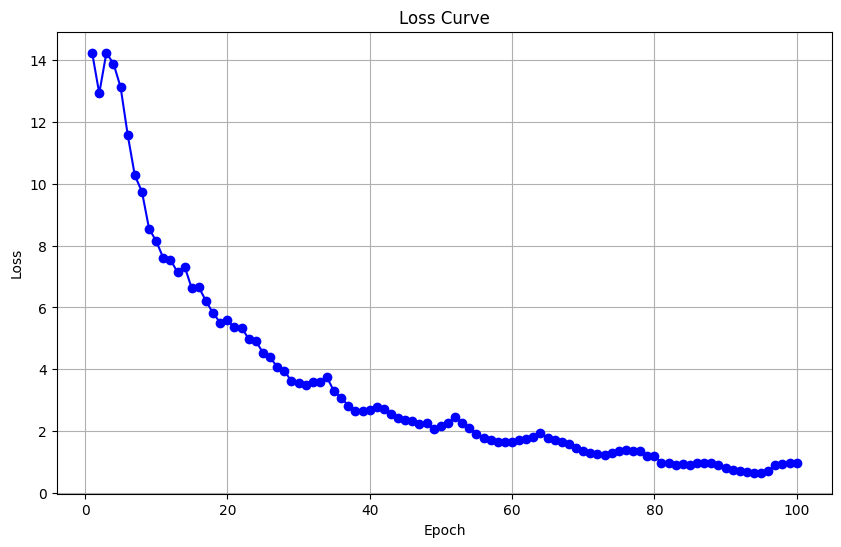

In [11]:
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size1=64, hidden_size2=64, hidden_size3=64)

# Define hyperparameters
epochs = 100
learning_rate = 0.01
losses = []  # List to store loss values

for epoch in range(epochs):
    # Forward pass
    output = nn.forward(X_train)

    # Compute loss
    loss = nn.compute_loss(y_train, output)
    losses.append(loss)  # Store the loss value
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

    # Backward pass
    nn.backward(X_train, y_train, learning_rate)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid(True)
plt.show()


In [12]:
# Forward pass with test data
y_pred = nn.forward(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 43.00%


In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Precision, Recall, F1-Score
print(classification_report(y_true_classes, y_pred_classes))


Accuracy: 43.00%
              precision    recall  f1-score   support

           0       0.29      0.47      0.36        30
           1       0.59      0.43      0.50        46
           2       0.46      0.50      0.48        44
           3       0.44      0.42      0.43        38
           4       0.41      0.33      0.37        42

    accuracy                           0.43       200
   macro avg       0.44      0.43      0.43       200
weighted avg       0.45      0.43      0.43       200



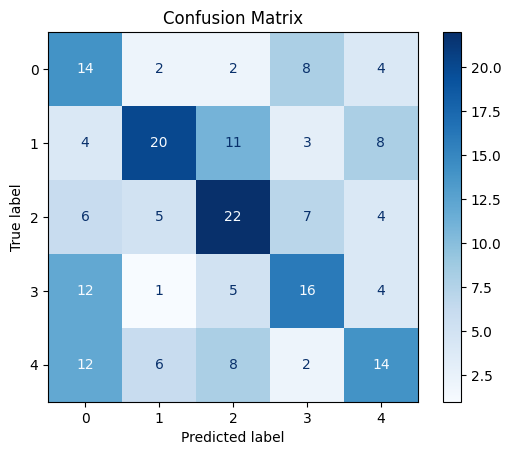

In [14]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


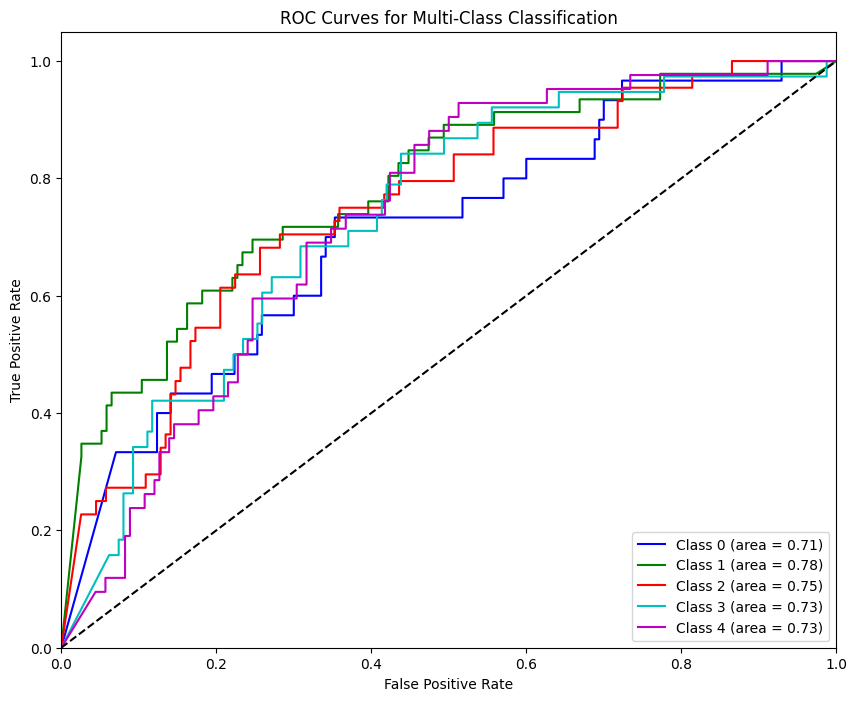

In [15]:
# Define colors for each class
colors = ['b', 'g', 'r', 'c', 'm']  # Example colors: blue, green, red, cyan, magenta

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(5):  # Assuming 5 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()